In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

C:\Users\wtais\Anaconda3\envs\hackthewind\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

n_samples = len(x_train)

In [3]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [23]:
x_train = np.rint(x_train).astype(np.float32)

In [6]:
x_train[3]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

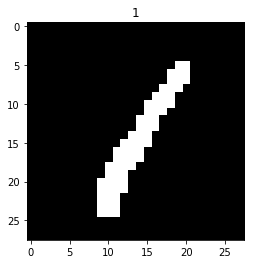

In [25]:
plt.imshow(x_train[3],cmap='gray')
plt.title(y_train[3])
plt.show()

In [18]:
# Model
x = tf.placeholder(tf.float32, [None, 28, 28])
images_flat = tf.contrib.layers.flatten(x)
hidden_layer_1 = tf.contrib.layers.fully_connected(images_flat, 512, tf.nn.relu)
y = tf.contrib.layers.fully_connected(hidden_layer_1, 10, tf.nn.relu)
y_ = tf.placeholder(tf.float32, [None, 10])

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))

In [19]:
# One hot encode categorical labels
y_train_cat = np.zeros([len(y_train),10])
for indx, i in enumerate(y_train):
    y_train_cat[indx,i] = 1
    
y_test_cat = np.zeros([len(y_test),10])
for indx, i in enumerate(y_test):
    y_test_cat[indx,i] = 1

In [38]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

optimizer = tf.train.GradientDescentOptimizer(0.1)
train_step = optimizer.minimize(loss)

batch_size = 300
loss_batch = []

# Mini-batch gradient descent
for epoch in range(3000):
    rand_index = np.random.choice(n_samples, size=batch_size)
    x_batch = x_train[rand_index,:]
    y_batch = y_train_cat[rand_index]
    sess.run(train_step, feed_dict={x: x_batch, y_: y_batch})

    if (epoch+1) % 5 == 0:
        temp_loss = sess.run(loss, feed_dict={x: x_batch, y_:y_batch})
        loss_batch.append(temp_loss)
        print('Step ', str(epoch+1), '; loss = ', temp_loss)

Step  5 ; loss =  2.0465987
Step  10 ; loss =  1.6303654
Step  15 ; loss =  1.3492438
Step  20 ; loss =  1.0896782
Step  25 ; loss =  1.0061388
Step  30 ; loss =  0.82592356
Step  35 ; loss =  0.7197891
Step  40 ; loss =  0.64392585
Step  45 ; loss =  0.6409801
Step  50 ; loss =  0.5822742
Step  55 ; loss =  0.5309977
Step  60 ; loss =  0.52393115
Step  65 ; loss =  0.61557597
Step  70 ; loss =  0.50641316
Step  75 ; loss =  0.52712023
Step  80 ; loss =  0.5428428
Step  85 ; loss =  0.49339354
Step  90 ; loss =  0.52103823
Step  95 ; loss =  0.34304821
Step  100 ; loss =  0.38443625
Step  105 ; loss =  0.41707224
Step  110 ; loss =  0.46352255
Step  115 ; loss =  0.3781092
Step  120 ; loss =  0.4218219
Step  125 ; loss =  0.35569167
Step  130 ; loss =  0.43509874
Step  135 ; loss =  0.3496038
Step  140 ; loss =  0.36138055
Step  145 ; loss =  0.4533692
Step  150 ; loss =  0.41051176
Step  155 ; loss =  0.3553767
Step  160 ; loss =  0.33013976
Step  165 ; loss =  0.39325637
Step  170 ; 

Step  1350 ; loss =  0.17828831
Step  1355 ; loss =  0.19031382
Step  1360 ; loss =  0.2042889
Step  1365 ; loss =  0.111154966
Step  1370 ; loss =  0.14266938
Step  1375 ; loss =  0.13745043
Step  1380 ; loss =  0.13488661
Step  1385 ; loss =  0.17145154
Step  1390 ; loss =  0.20528449
Step  1395 ; loss =  0.18034211
Step  1400 ; loss =  0.17003769
Step  1405 ; loss =  0.20312576
Step  1410 ; loss =  0.15187009
Step  1415 ; loss =  0.120535545
Step  1420 ; loss =  0.16397974
Step  1425 ; loss =  0.19834723
Step  1430 ; loss =  0.15771075
Step  1435 ; loss =  0.12640798
Step  1440 ; loss =  0.20987375
Step  1445 ; loss =  0.15589367
Step  1450 ; loss =  0.13314767
Step  1455 ; loss =  0.15994081
Step  1460 ; loss =  0.17816266
Step  1465 ; loss =  0.14705038
Step  1470 ; loss =  0.1584097
Step  1475 ; loss =  0.16884686
Step  1480 ; loss =  0.1684594
Step  1485 ; loss =  0.10632135
Step  1490 ; loss =  0.19915429
Step  1495 ; loss =  0.14697252
Step  1500 ; loss =  0.1731834
Step  1505

Step  2630 ; loss =  0.11884177
Step  2635 ; loss =  0.14635187
Step  2640 ; loss =  0.089929014
Step  2645 ; loss =  0.17161219
Step  2650 ; loss =  0.08146466
Step  2655 ; loss =  0.121815756
Step  2660 ; loss =  0.11463358
Step  2665 ; loss =  0.14308117
Step  2670 ; loss =  0.13773173
Step  2675 ; loss =  0.10635933
Step  2680 ; loss =  0.089521624
Step  2685 ; loss =  0.1254117
Step  2690 ; loss =  0.1037066
Step  2695 ; loss =  0.07501176
Step  2700 ; loss =  0.06857918
Step  2705 ; loss =  0.11916508
Step  2710 ; loss =  0.091084056
Step  2715 ; loss =  0.09148526
Step  2720 ; loss =  0.11466105
Step  2725 ; loss =  0.058650613
Step  2730 ; loss =  0.1026623
Step  2735 ; loss =  0.092096314
Step  2740 ; loss =  0.09015337
Step  2745 ; loss =  0.09148603
Step  2750 ; loss =  0.0891732
Step  2755 ; loss =  0.13788915
Step  2760 ; loss =  0.11350227
Step  2765 ; loss =  0.12881635
Step  2770 ; loss =  0.114633486
Step  2775 ; loss =  0.099811286
Step  2780 ; loss =  0.07238847
Step

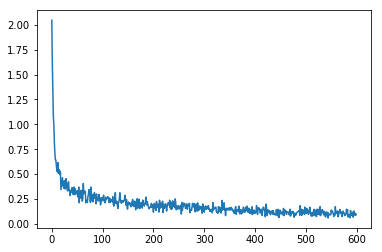

In [39]:
plt.plot(loss_batch)
plt.show()

In [40]:
# Evaluation
y_pred = sess.run([tf.argmax(y, 1)], feed_dict={x: x_test})[0]
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_accuracy = (y_test == y_pred).mean()
print('RMSE of predictions : ', test_rmse)
print('Accuracy of predictions : ', test_accuracy)


RMSE of predictions :  0.8099382692526635
Accuracy of predictions :  0.9664
